<a href="https://colab.research.google.com/github/ishanbangale/FullStack/blob/master/AAPL_StockPredictionusingStacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
key="insert key here"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-03-31 00:00:00+00:00,108.99,109.90,108.88,109.72,25888449,25.338729,25.550292,25.313156,25.508445,103553796,0.0,1.0
1,AAPL,2016-04-01 00:00:00+00:00,109.99,110.00,108.20,108.78,25873950,25.571216,25.573541,25.155065,25.289907,103495800,0.0,1.0
2,AAPL,2016-04-04 00:00:00+00:00,111.12,112.19,110.27,110.42,37356204,25.833926,26.082687,25.636312,25.671185,149424816,0.0,1.0
3,AAPL,2016-04-05 00:00:00+00:00,109.81,110.73,109.42,109.51,26578652,25.529368,25.743256,25.438699,25.459622,106314608,0.0,1.0
4,AAPL,2016-04-06 00:00:00+00:00,110.96,110.98,109.20,110.23,26404077,25.796728,25.801378,25.387552,25.627013,105616308,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-03-23 00:00:00+00:00,122.54,124.24,122.1400,123.33,95467142,122.54,124.24,122.1400,123.33,95467142,0.0,1.0
1254,AAPL,2021-03-24 00:00:00+00:00,120.09,122.90,120.0650,122.82,88530485,120.09,122.90,120.0650,122.82,88530485,0.0,1.0
1255,AAPL,2021-03-25 00:00:00+00:00,120.59,121.66,119.0000,119.54,98844681,120.59,121.66,119.0000,119.54,98844681,0.0,1.0
1256,AAPL,2021-03-26 00:00:00+00:00,121.21,121.48,118.9200,120.35,94071234,121.21,121.48,118.9200,120.35,94071234,0.0,1.0
1257,AAPL,2021-03-29 00:00:00+00:00,121.39,122.58,120.7299,121.65,80819203,121.39,122.58,120.7299,121.65,80819203,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       108.99
1       109.99
2       111.12
3       109.81
4       110.96
         ...  
1253    122.54
1254    120.09
1255    120.59
1256    121.21
1257    121.39
Name: close, Length: 1258, dtype: float64

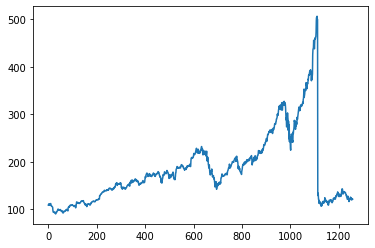

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0       108.99
1       109.99
2       111.12
3       109.81
4       110.96
         ...  
1253    122.54
1254    120.09
1255    120.59
1256    121.21
1257    121.39
Name: close, Length: 1258, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.04485869]
 [0.04726398]
 [0.04998196]
 ...
 [0.07276007]
 [0.07425135]
 [0.07468431]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
train_data

array([[0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.01775105],
       [0.01823211],
       [0.01993987],
       [0.020

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 300ms/step - loss: 0.0211 - val_loss: 0.0512
Epoch 2/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0027 - val_loss: 0.0259
Epoch 3/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0016 - val_loss: 0.0249
Epoch 4/100
12/12 [==============================] - 2s 194ms/step - loss: 5.6267e-04 - val_loss: 0.0210
Epoch 5/100
12/12 [==============================] - 2s 192ms/step - loss: 4.7068e-04 - val_loss: 0.0206
Epoch 6/100
12/12 [==============================] - 2s 194ms/step - loss: 4.7462e-04 - val_loss: 0.0200
Epoch 7/100
12/12 [==============================] - 2s 191ms/step - loss: 4.3001e-04 - val_loss: 0.0195
Epoch 8/100
12/12 [==============================] - 2s 189ms/step - loss: 4.1336e-04 - val_loss: 0.0192
Epoch 9/100
12/12 [==============================] - 2s 196ms/step - loss: 3.7987e-04 - val_loss: 0.0186
Epoch 10/100
12/12 [==============================] - 2s 201ms/step

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

169.50082754102348

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

270.8586546031274

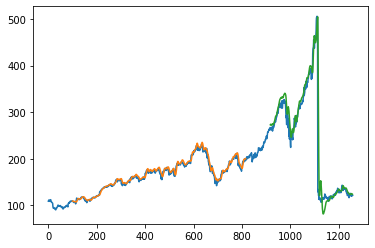

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.100324714371617

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.07864553]
101
1 day input [0.05919423 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425
 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975
 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284 0.07605532

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

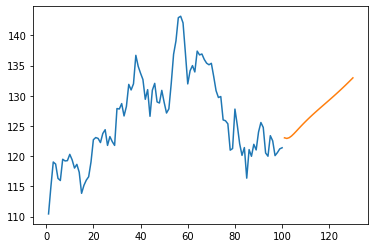

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

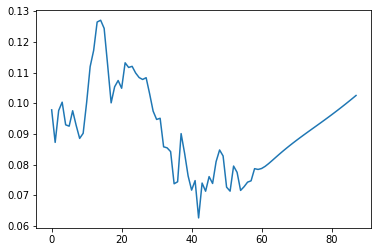

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

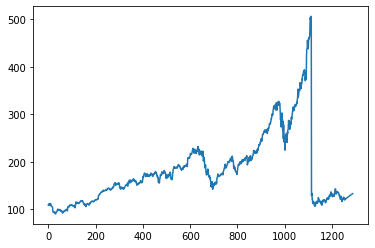

In [ ]:
plt.plot(df3)